# Breast Cancer Classification using TPOT


#### This project utilizes TPOT, an automated machine learning (AutoML) library, to build and optimize a classification model for breast cancer diagnosis using a subset of features from the dataset.

## Import Libraries

In [1]:
import pandas as pd  # For data manipulation
from tpot import TPOTClassifier  # For automated machine learning TPOT (Tree-based Pipeline Optimization Tool) 
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation metrics
import matplotlib.pyplot as plt  # For plotting
from sklearn.inspection import permutation_importance  # For feature importance analysis
import seaborn as sns  # For visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import pickle  # For saving the trained model
import warnings
warnings.filterwarnings("ignore")


C:\Users\fofoh\anaconda3\envs\oumi\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


##  Load and Preprocess the Dataset

###  Load the Dataset


This dataset contains features related to breast cancer diagnosis, including various metrics like radius, texture, and area.
You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).


In [2]:
# Ensure the path is correct
df = pd.read_csv(r'C:\Users\fofoh\Desktop\Automated Machine Learning for Breast Cancer Diagnosis Using TPOT\data.csv')

###  Exploratory data analysis (EDA)

In [3]:
df.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
# Checking missing values
missing_values = df.isnull().sum()
missing_values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
# Get descriptive statistics
df.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


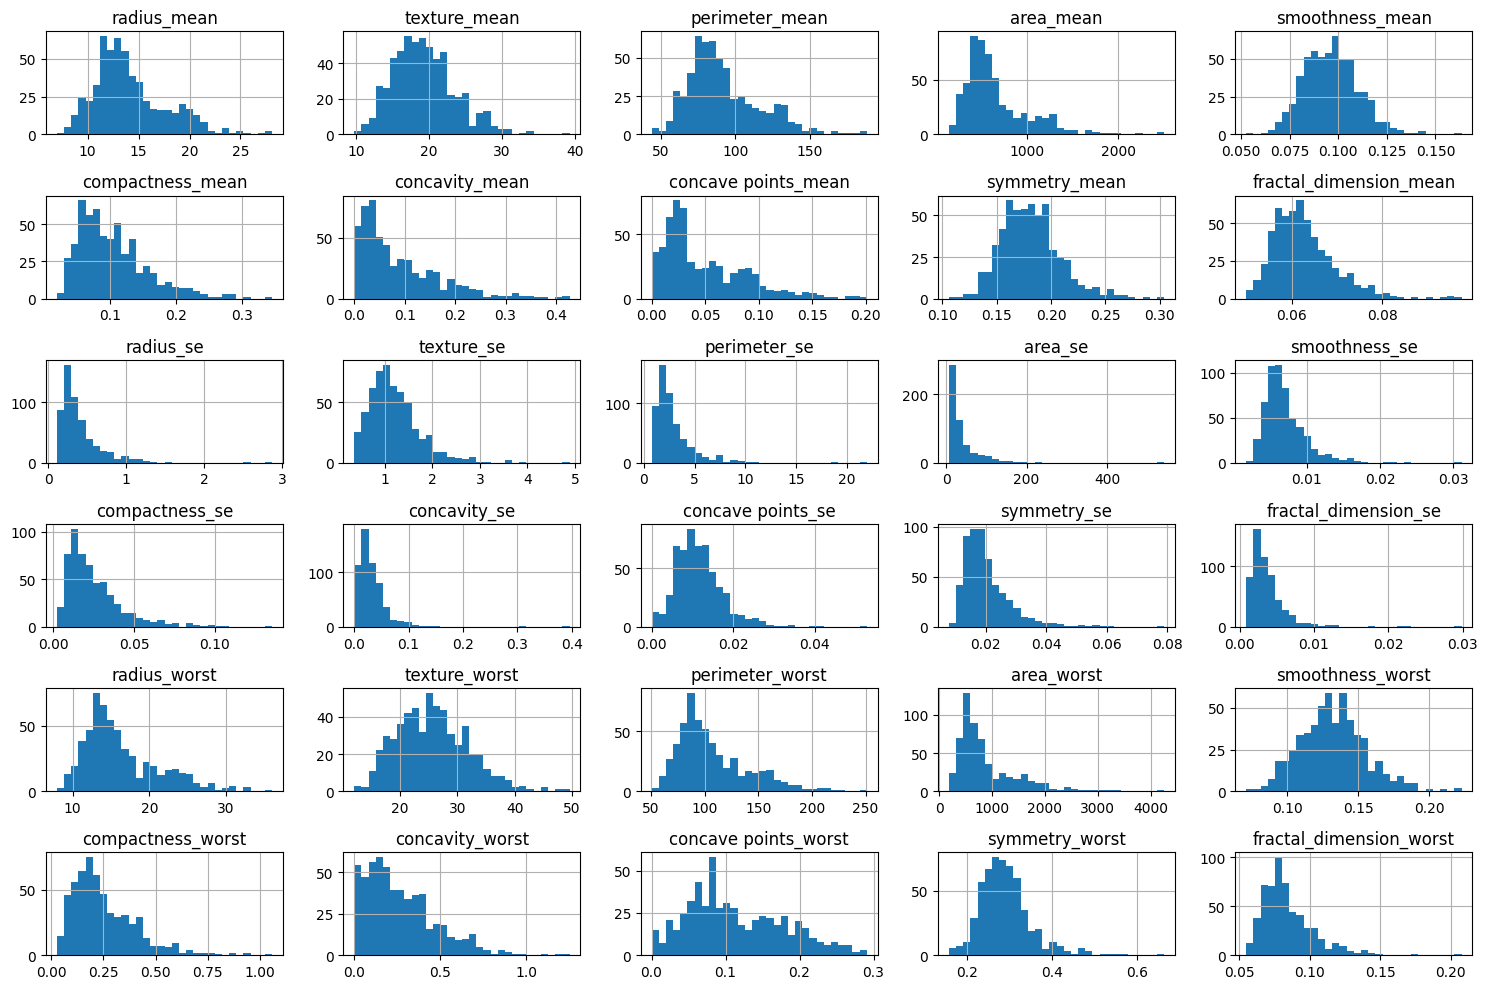

In [36]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Diagnosis Rate')

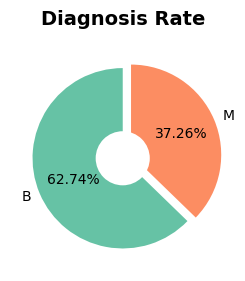

In [37]:
#Visualization to show diagnosis in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(diagnosis_rate))
plt.pie(diagnosis_rate, labels=["B","M"], autopct="%.2f%%", textprops={"size":10},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Diagnosis Rate",fontweight="black",size=14 ,pad=15)

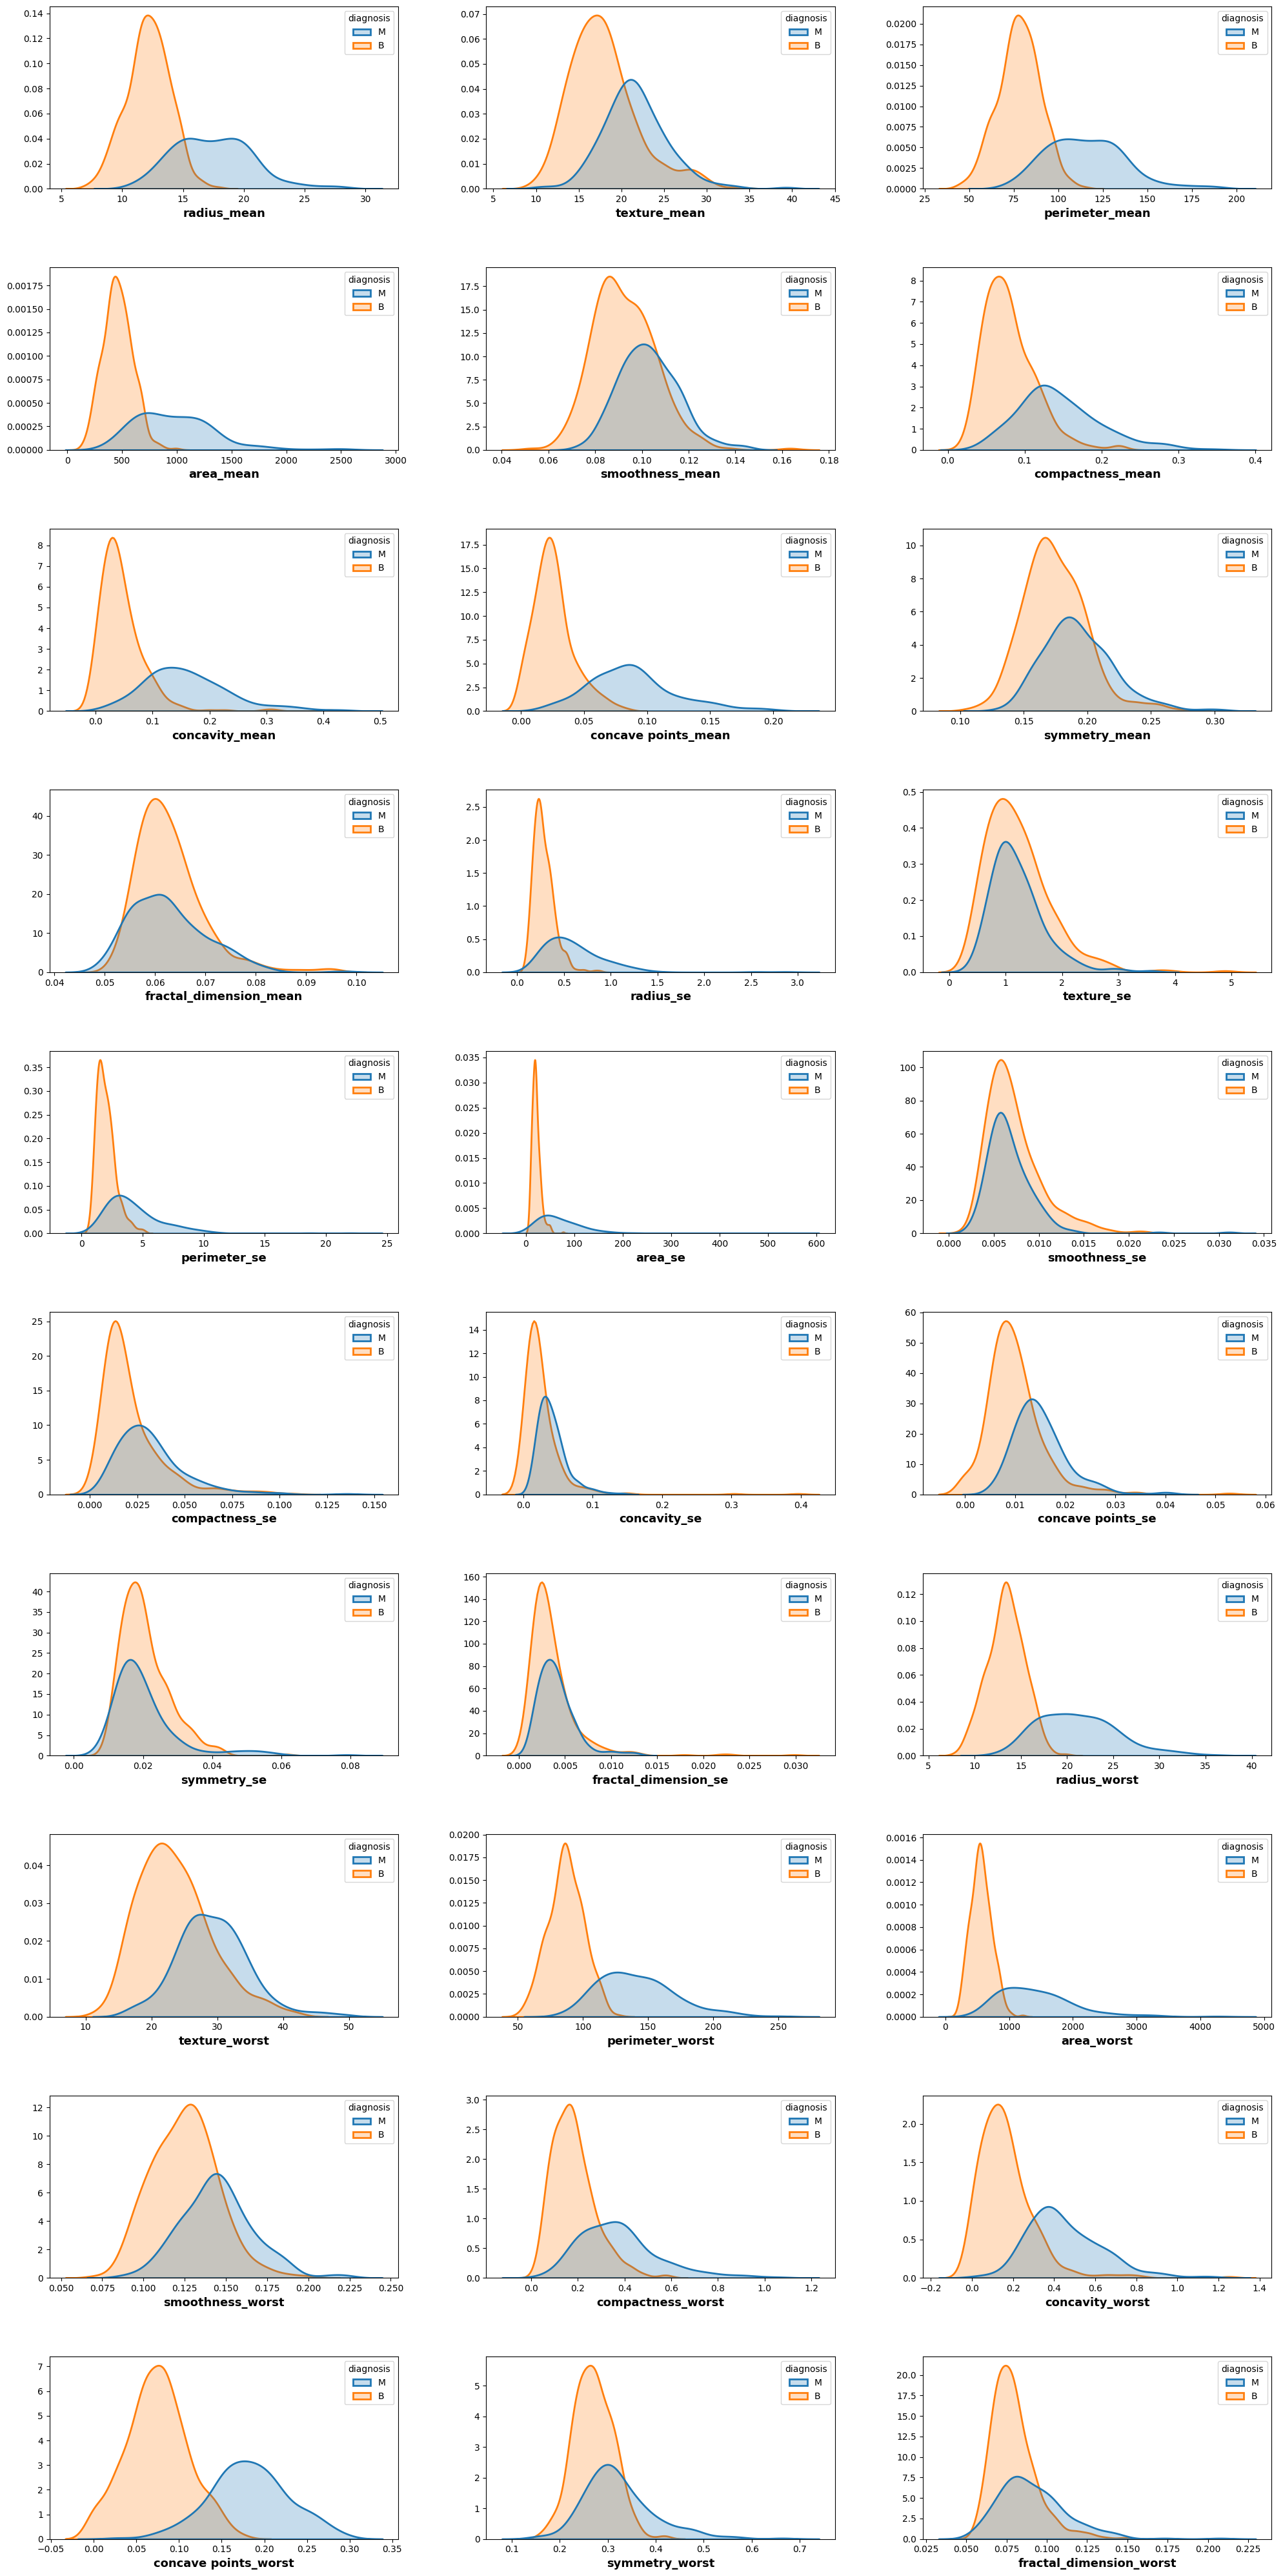

In [33]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis',color = "Green",shade = True)
    ax[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

### Feature Engineering

We drop the Unnamed: 32 and id columns as they don't provide meaningful information for the classification task.

In [9]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [10]:
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Select Features and Target Variable

We use a subset of features for the classification task and map the diagnosis column to binary values (M for Malignant = 1, B for Benign = 0).

We selected five features informed by our work as ML engineers and preliminary research on breast cancer. However, it is important to note that our selection may not fully align with established medical standards and accuracy.

In [11]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

In [12]:
X = df[selected_features]
y = df['diagnosis'].map({'M': 1, 'B': 0}) 

### Split the Data into Training and Test Sets

We split the data into training (80%) and test (20%) sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the TPOT Classifier

### Initialize and Train the TPOT Model

We use the TPOTClassifier to automatically optimize the machine learning pipeline.

TPOT is an open-source Python tool that automates the process of designing and optimizing machine learning pipelines using genetic programming. It leverages evolutionary algorithms to find the best models and preprocessing steps for a given dataset, making it a powerful tool for both beginners and experienced data scientists.

##### Key Features
- **Automated Machine Learning**: TPOT can automatically find the best models and parameters for your data.
- **Genetic Programming**: It uses genetic algorithms to evolve pipelines and select optimal models.
- **Easy Integration**: Works seamlessly with popular libraries such as scikit-learn.


For more details, you can visit the official TPOT documentation [here](https://epistasislab.github.io/tpot/).

In [14]:
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

In [15]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.923076923076923

Generation 2 - Current best internal CV score: 0.923076923076923

Generation 3 - Current best internal CV score: 0.923076923076923

Generation 4 - Current best internal CV score: 0.923076923076923

Generation 5 - Current best internal CV score: 0.923076923076923

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=18, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [16]:
# Print the best pipeline discovered by TPOT
print("\nBest pipeline found by TPOT:")
print(tpot.fitted_pipeline_)


Best pipeline found by TPOT:
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features=0.2, min_samples_leaf=8,
                                        min_samples_split=18,
                                        random_state=42))])


In [17]:
print(tpot.score(X_test, y_test))

0.9649122807017544


## Evaluation of the Model

###  Make Predictions

In [18]:
y_pred = tpot.predict(X_test)

###  Calculate Accuracy

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9649122807017544


###  Confusion Matrix and Classification Report

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print( conf_matrix)


[[71  0]
 [ 4 39]]


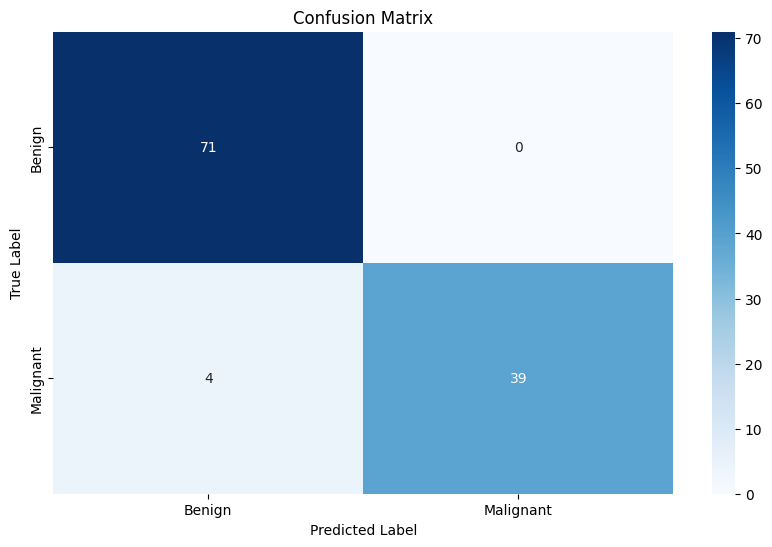

In [21]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Classification Report:

In [22]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## Feature Importance

We compute the permutation feature importance to understand which features had the most impact on model performance.

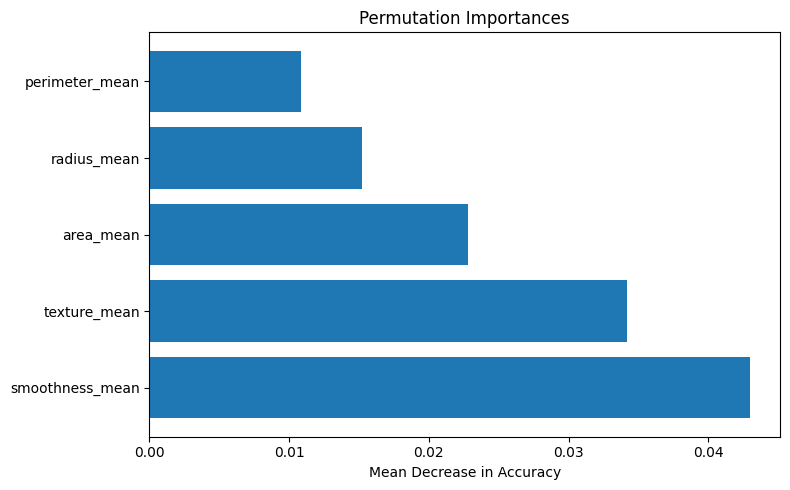

In [23]:
result = permutation_importance(tpot.fitted_pipeline_, X_test, y_test, n_repeats=30, random_state=42)

importances = result.importances_mean
indices = importances.argsort()[::-1]

# Adjusting figure size for a shorter plot
plt.figure(figsize=(8, 5))  # Reduced the size to make it shorter
plt.title('Permutation Importances')
plt.barh(range(X_test.shape[1]), importances[indices], align='center')
plt.yticks(range(X_test.shape[1]), [X_test.columns[i] for i in indices])
plt.xlabel('Mean Decrease in Accuracy')
plt.tight_layout()  # Ensure everything fits well
plt.show()


##  ROC Curve

We plot the Receiver Operating Characteristic (ROC) curve to evaluate the performance of the model.

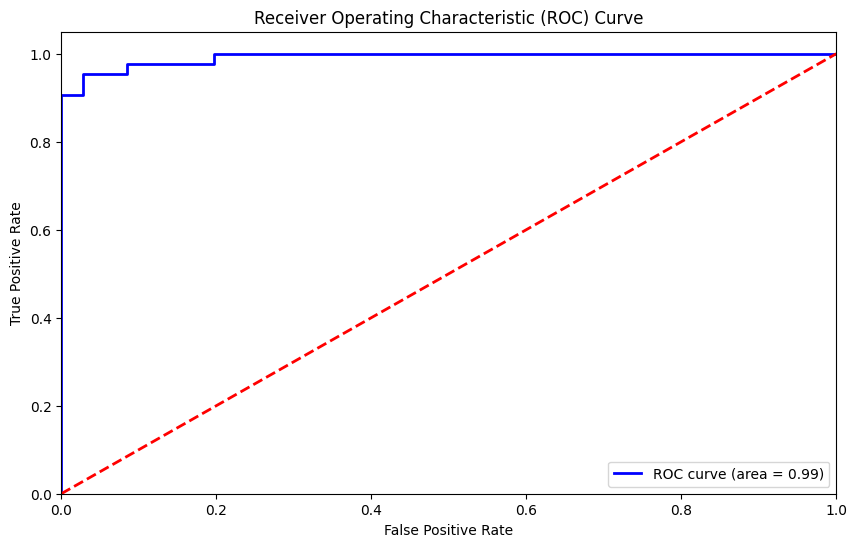

In [24]:
# Plotting the ROC Curve
y_prob = tpot.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##  Precision-Recall Curve

We also plot the Precision-Recall curve to evaluate the balance between precision and recall.

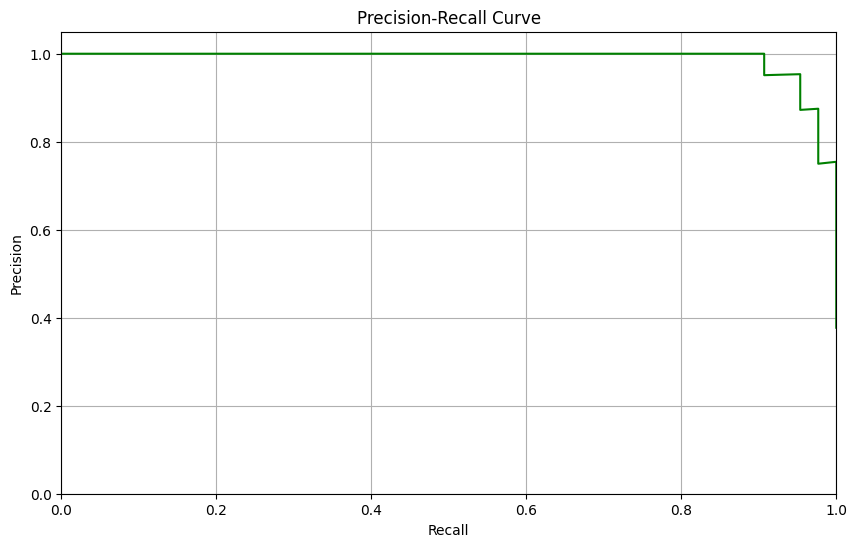

In [25]:
# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

##  Export the Model 

In [26]:
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(tpot.fitted_pipeline_, f)